In [1]:
!pip install ISR --no-deps

In [2]:
import os 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [4]:
!pip install ISR==2.2.0
from ISR.models import RDN
rdn = RDN(weights='noise-cancel')
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image
image = Image.open("/kaggle/input/mushhh-hutech/train/nấm mỡ/NM006.jpg")

# Generate the super-resolved image
lr_img = np.array(image)
sr_img = rdn.predict(lr_img, by_patch_of_size=1000)
sr_img_pil = Image.fromarray(sr_img)

INFO: pip is looking at multiple versions of isr to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from isr) (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


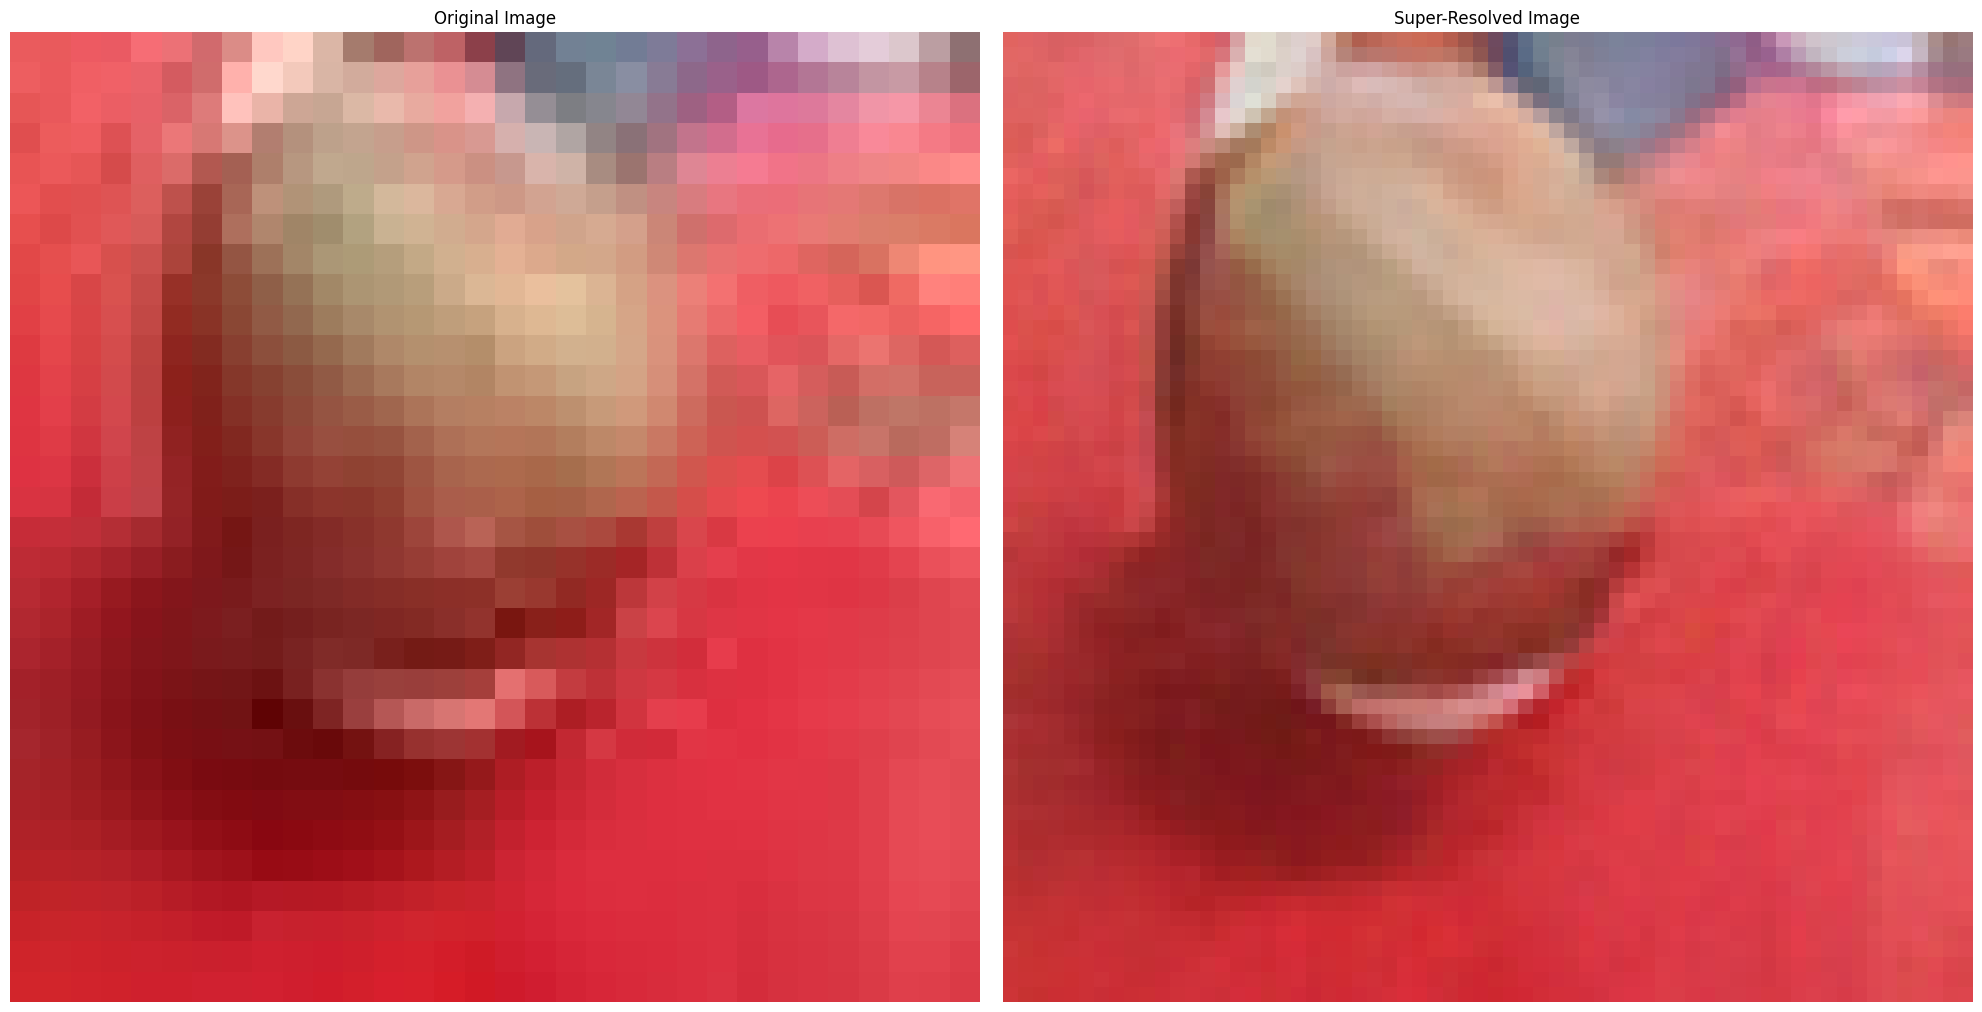

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image
image = Image.open("/kaggle/input/mushhh-hutech/train/nấm mỡ/NM006.jpg")

# Generate the super-resolved image
lr_img = np.array(image)
sr_img = rdn.predict(lr_img, by_patch_of_size=1000)
sr_img_pil = Image.fromarray(sr_img)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(sr_img)
axes[1].set_title('Super-Resolved Image')
axes[1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
from PIL import Image
import shutil
from tqdm import tqdm

# Assuming your RDN model is already defined and loaded as 'rdn'

def process_images(source_root, target_root):
    """
    Process all images in the source directory structure,
    apply super-resolution, and save to the target directory
    with the same structure.
    
    Args:
        source_root: Path to the source 'train' directory
        target_root: Path to the target 'data' directory
    """
    # Create the target root directory if it doesn't exist
    if not os.path.exists(target_root):
        os.makedirs(target_root)
    
    # Get all subdirectories in the source directory
    subdirs = [d for d in os.listdir(source_root) if os.path.isdir(os.path.join(source_root, d))]
    
    # Count total number of images for overall progress bar
    total_images = 0
    for subdir in subdirs:
        source_subdir_path = os.path.join(source_root, subdir)
        image_files = [f for f in os.listdir(source_subdir_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        total_images += len(image_files)
    
    # Main progress bar for overall progress
    main_pbar = tqdm(total=total_images, desc="Overall Progress", position=0)
    
    # Process each subdirectory with progress tracking
    for subdir in tqdm(subdirs, desc="Processing Folders", position=1):
        source_subdir_path = os.path.join(source_root, subdir)
        target_subdir_path = os.path.join(target_root, subdir)
        
        # Create the target subdirectory if it doesn't exist
        if not os.path.exists(target_subdir_path):
            os.makedirs(target_subdir_path)
        
        # Get all image files in the subdirectory
        image_files = [f for f in os.listdir(source_subdir_path) 
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Process each image file with progress tracking
        for img_file in tqdm(image_files, desc=f"Processing {subdir}", position=2, leave=False):
            source_img_path = os.path.join(source_subdir_path, img_file)
            target_img_path = os.path.join(target_subdir_path, img_file)
            
            try:
                # Open the image
                image = Image.open(source_img_path)
                
                # Apply super-resolution
                lr_img = np.array(image)
                sr_img = rdn.predict(lr_img, by_patch_of_size=1000)
                sr_img_pil = Image.fromarray(sr_img)
                
                # Save the processed image
                sr_img_pil.save(target_img_path)
                
            except Exception as e:
                print(f"Error processing {source_img_path}: {e}")
            
            # Update the main progress bar
            main_pbar.update(1)
    
    # Close the progress bars
    main_pbar.close()

#UPSCALE DATA TRAIN FOLDER
# Specify the paths
source_train_dir = "/kaggle/input/mushhh-hutech/train"  # Change this to your actual source path
target_data_dir = "/kaggle/working/data"               # Change this to your desired target path

# Process the images
process_images(source_train_dir, target_data_dir)

print(f"Processing complete. Super-resolved images are saved to {target_data_dir}")

Overall Progress: 0it [00:00, ?it/s]
Processing Folders: 0it [00:00, ?it/s]
Overall Progress: 0it [00:00, ?it/s]

Processing complete. Super-resolved images are saved to /kaggle/working/data


In [ ]:
# Thư mục chứa ảnh gốc
#UPSCALE DATA TEST FOLDER
input_folder = "/kaggle/input/private-test/hutech_oai_2025_test"
# Thư mục lưu ảnh kết quả
output_folder = "output_images"
os.makedirs(output_folder, exist_ok=True)  # Tạo thư mục nếu chưa có

# Duyệt qua tất cả các file trong thư mục
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Chỉ xử lý file ảnh
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Tăng độ phân giải
        lr_img = np.array(image)
        sr_img = rdn.predict(lr_img, by_patch_of_size=1000)
        sr_img_pil = Image.fromarray(sr_img)

        # Lưu ảnh với cùng tên ảnh gốc
        output_path = os.path.join(output_folder, filename)
        sr_img_pil.save(output_path)

        print(f"Đã xử lý và lưu: {output_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Đã xử lý và lưu: output_images/1745207825476_c17b49f4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Đã xử lý và lưu: output_images/1745207819794_85b66a47.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Đã xử lý và lưu: output_images/1745207828166_d3901c79.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Đã xử lý và lưu: output_images/1745207826270_3893e5c4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Đã xử lý và lưu: output_images/1745207828551_631af1c5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Đã xử lý và lưu: output_images/1745207824924_4367ca4d.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Đã xử lý và lưu: output_images/1745207823866_8d04c00a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Đã xử lý và lưu: output_images/1745207823144_ef9105b0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Đã xử lý và lưu: output_images/1745207826830_0b08e190.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Đã xử lý và lưu: output_images/1745207825904_8e9822e7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Đã

In [7]:
!zip -r test2.zip /kaggle/working/output_images


  adding: kaggle/working/output_images/ (stored 0%)
  adding: kaggle/working/output_images/1745207822908_e22ca111.jpg (deflated 11%)
  adding: kaggle/working/output_images/1745207819656_033f4b44.jpg (deflated 9%)
  adding: kaggle/working/output_images/1745207827410_91f49684.jpg (deflated 11%)
  adding: kaggle/working/output_images/1745207824438_b3069e5f.jpg (deflated 9%)
  adding: kaggle/working/output_images/1745207827202_5b53eed8.jpg (deflated 9%)
  adding: kaggle/working/output_images/1745207822187_9e46b51d.jpg (deflated 9%)
  adding: kaggle/working/output_images/1745207826142_37b2d95b.jpg (deflated 12%)
  adding: kaggle/working/output_images/1745207819809_ce8b7087.jpg (deflated 12%)
  adding: kaggle/working/output_images/1745207824531_d5f161d7.jpg (deflated 13%)
  adding: kaggle/working/output_images/1745207826607_d27af70e.jpg (deflated 11%)
  adding: kaggle/working/output_images/1745207825667_db6e100b.jpg (deflated 10%)
  adding: kaggle/working/output_images/1745207824892_364ec5e8